<a href="https://colab.research.google.com/github/BrunaKrasotaMatos/MineracaoDados/blob/main/BIG_A5_Clustering_BrunaMatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 5** 
## CASO: Clustering, Segmentando Países pela Força de Trabalho 
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [6]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv',index_col=0)
df.head()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Country,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [7]:
# # Inicialmente vamos analisar todas as colunas
df.describe(include='all')

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


In [9]:
# Aparentemente nao temos dados nulos
# Apenas Country é uma variável categórica
# As demais são numéricas

## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [11]:
# # Normalizando usando StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:5]

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507]])

## Número de Clusters

(Moodle) **Q1**. Qual o melhor número de clusters pela *regra do cotovelo* e pelo valor médio de silhueta aplicanaod o `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



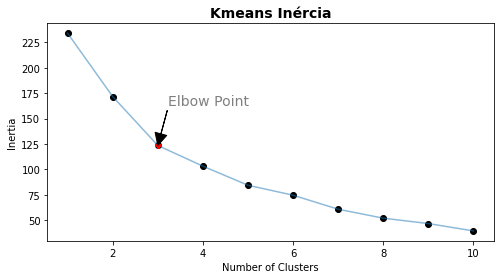

In [12]:
# Regra do Cotovelo -> 3 clusters
from sklearn.cluster import KMeans

def inercia(X=X, kmin=2, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1234)
      clf.fit(X)
      inertia.append(clf.inertia_)
      
  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(1 , 11) , inertia , 'ko')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,1,10)
# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[2]), 
            xytext=(10, 40), fontsize=14,
            textcoords='offset points', 
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show() 

In [13]:
# Silhueta -> 2 clusters
from sklearn import metrics

for n_clusters in range(2,10):
  clf = KMeans(n_clusters = n_clusters , random_state= 1234)  
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.323
Silhueta média para 3 clusters:  0.278
Silhueta média para 4 clusters:  0.231
Silhueta média para 5 clusters:  0.202
Silhueta média para 6 clusters:  0.164
Silhueta média para 7 clusters:  0.2
Silhueta média para 8 clusters:  0.194
Silhueta média para 9 clusters:  0.182


(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`),`complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue outros parâmetros não solicitados. 

In [15]:
# 
from sklearn.cluster import AgglomerativeClustering

print()
print('Ward')
print()
for n_clusters in range(2,10):
  clf = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward')   
  clf.fit(X)
  labels_ward = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels_ward, metric='euclidean'),3))

print()
print('Complete')
print()
for n_clusters in range(2,10):
  clf = AgglomerativeClustering(n_clusters)  
  clf.fit(X)
  labels_complete = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels_complete, metric='euclidean'),3))

print()
print('Single')
print()
for n_clusters in range(2,10):
  clf = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='single') 
  clf.fit(X)
  labels_single = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels_single, metric='euclidean'),3))




Ward

Silhueta média para 2 clusters:  0.456
Silhueta média para 3 clusters:  0.244
Silhueta média para 4 clusters:  0.251
Silhueta média para 5 clusters:  0.242
Silhueta média para 6 clusters:  0.179
Silhueta média para 7 clusters:  0.187
Silhueta média para 8 clusters:  0.175
Silhueta média para 9 clusters:  0.18

Complete

Silhueta média para 2 clusters:  0.456
Silhueta média para 3 clusters:  0.244
Silhueta média para 4 clusters:  0.251
Silhueta média para 5 clusters:  0.242
Silhueta média para 6 clusters:  0.179
Silhueta média para 7 clusters:  0.187
Silhueta média para 8 clusters:  0.175
Silhueta média para 9 clusters:  0.18

Single

Silhueta média para 2 clusters:  0.461
Silhueta média para 3 clusters:  0.388
Silhueta média para 4 clusters:  0.134
Silhueta média para 5 clusters:  0.211
Silhueta média para 6 clusters:  0.128
Silhueta média para 7 clusters:  0.101
Silhueta média para 8 clusters:  0.086
Silhueta média para 9 clusters:  0.126


## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as mátricas e resultados para uma *solução*. 

(Moodle) **Q3**. Verifique a *distribuição* da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

> Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um *outlier*.



In [23]:
# 
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [28]:
df["Cluster"] = labels
#df.head(25)
print(df.Cluster.value_counts())

0    25
1     1
Name: Cluster, dtype: int64


In [ ]:
# nao eh um bom modelo, pois temos um outlier

## Clusterização `Kmeans`,  $K=3$.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele? 

(Moodle) **Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.



In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código